<a href="https://colab.research.google.com/github/himanshag/SECOM/blob/main/base_file.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### Importing packages

In [539]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import plotly as py
import plotly.express as px
import missingno as msno
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import accuracy_score
import BorutaPy
# to avoid warnings
import warnings
warnings.filterwarnings('ignore')
warnings.warn("this will not show")

ModuleNotFoundError: ignored

#### Functions

In [ ]:
# Function to remove missing values above a given threshold
def missing_remove(dataframe, threshold):
    columns = dataframe.columns[(dataframe.isna().sum()/dataframe.shape[1])>threshold].tolist()
    print(f"# Features deleted with more than {threshold} % missing values", len(columns))
    return dataframe.drop(columns, axis=1,inplace=True)

In [ ]:
# Function to remove features with unique values
def unique_remove(dataframe):
    unique_features = []
    for col in dataframe.columns:
        if(dataframe[col].unique().size == 2):
            if(len(unique_features) == 0):
                unique_features =  dataframe[col]
            else:
                 unique_features = pd.concat([unique_features, dataframe[col]], axis=1)
            dataframe.drop(col, axis=1, inplace=True)

In [ ]:
# Function to remove outlier
def outlier_detection_zcore(dataframe):
    data_mean, data_std  = dataframe.mean(), dataframe.std()
    data_z_scores = ((dataframe - data_mean) / data_std).abs()
    m = data_z_scores > 3
    dataframe = dataframe.mask(m,inplace=True)
    return dataframe

In [ ]:
def rfc(X_train_rfc,X_test_rfc,max_depth):
  model = RandomForestClassifier(n_estimators=100, criterion='entropy', max_depth=max_depth)
  model.fit(X_train_rfc, y_train)
  y_pred = model.predict(X_test_rfc)
  sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", yticklabels = ['Pred. Pass' , 'Pred. Fail'] , xticklabels = ['Act. Pass', 'Act. Fail'])
  print(classification_report(y_test, y_pred))
  ax = plt.gca()
  plot = plot_roc_curve(model, X_test_rfc, y_test, ax=ax, alpha=0.8)
  print("Test Accuracy Score", accuracy_score(y_test, y_pred))

#### Importing and basic cleaning

In [ ]:
# Importing data from internet in runtime
data_url="https://archive.ics.uci.edu/ml/machine-learning-databases/secom/secom.data"

In [ ]:
# Assigning data to a pandas dataframe
secom_data = pd.read_csv(data_url,sep=' ',header=None)

In [ ]:
# Renaming the columns 
secom_data.columns = ["Feature_"+str(column+1) for column in range(len(secom_data.columns))]
secom_data.head()

,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,Feature_10,...,Feature_581,Feature_582,Feature_583,Feature_584,Feature_585,Feature_586,Feature_587,Feature_588,Feature_589,Feature_590
0,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.5005,0.0162,...,NaN,NaN,0.5005,0.0118,0.0035,2.3630,NaN,NaN,NaN,NaN
1,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.4966,-0.0005,...,0.0060,208.2045,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045
2,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,1.4436,0.0041,...,0.0148,82.8602,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602
3,2988.72,2479.90,2199.0333,909.7926,1.3204,100.0,104.2367,0.1217,1.4882,-0.0124,...,0.0044,73.8432,0.4990,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432
4,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,1.5031,-0.0031,...,NaN,NaN,0.4800,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432


In [ ]:
# Importing target data from internet in runtime
label_url="https://archive.ics.uci.edu/ml/machine-learning-databases/secom/secom_labels.data"

In [ ]:
# Assigning target data to a pandas dataframe
secom_labels = pd.read_csv(label_url, sep = " ",header=None)

In [ ]:
# Renaming the columns 
secom_labels.columns = ["Classification","Timestamp"]

In [ ]:
# Changing datatype for consitency
secom_labels['Timestamp'] = pd.to_datetime(secom_labels['Timestamp'],errors='raise')

In [ ]:
# Merging the data
data= pd.concat([secom_labels,secom_data],axis=1)

In [ ]:
# Dropping the timestamp column as it provides no insights
data.drop(columns="Timestamp", errors='raise',inplace=True)

In [ ]:
target = data[['Classification']]
data.drop(['Classification'], axis=1,inplace=True)

#### Spliting the data into training set and test set

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data,target, test_size=0.25, random_state=42, stratify=target)
# We use the startify parameter as the data is imbalanced on the basis of pass and fail and this will ensure the same 
#is retained when we split - Random state will help us create a reproducible data - Test size is the split ration

In [ ]:
X_test_original = X_test

#### Re-labeling the Target values


In [ ]:
# Relabeling target variables 1 is pass and 0 is fail
y_train = y_train.replace(to_replace=[-1, 1], value=[1, 0])
y_test = y_test.replace(to_replace=[-1, 1], value=[1, 0])

In [ ]:
# # Scaling the data
# scaler = StandardScaler()
# scaler.fit(X_train)
# X_train = pd.DataFrame(scaler.transform(X_train), columns=X_train.columns)
# X_test = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

# Decision : Removing columns with more that 50% missing values

In [ ]:
X_train.shape

(1175, 590)

In [ ]:
X_train_missing = X_train
missing_remove(X_train_missing, 0.5)
X_train_missing.shape

# Features deleted with more than 0.5 % missing values 32


(1175, 558)

# Decision : Removing Columns with non unique values

In [ ]:
X_train_unique = X_train_missing
unique_remove(X_train_unique)
X_train_unique.shape

(1175, 442)

In [ ]:
# From test set deleting columns that are removed in training set
X_test_unique = pd.DataFrame(X_test[np.array(X_train.columns)])
X_test_unique.shape

(392, 442)

# Decision : Replacing outliers with 3s boundary

##### Other option of removing outliers and replacing them has been explored in file "Base file - removing outliers and replacing with knn.ipynb"

In [ ]:
def replace_outlier(val, mean, std):
    if val > mean + 3*std:
        return mean + 3*std 
    elif val < mean - 3*std:
        return mean - 3*std
    return val

In [ ]:
# replace with 3s in X_train
for col in X_train_unique.columns:
    mean = X_train_unique[col].mean()
    std_dev = X_train_unique[col].std(axis=0)
    X_train_unique[col] = X_train_unique[col].map(lambda x: replace_outlier(x, mean, std_dev))

In [ ]:
# replace with 3s in X_test
for col in X_test_unique.columns:
    mean = X_test_unique[col].mean()
    std_dev = X_test_unique[col].std(axis=0)
    X_test_unique[col] = X_test_unique[col].map(lambda x: replace_outlier(x, mean, std_dev))

# Decision : KNN Imputation

In [ ]:
from sklearn.impute import KNNImputer
knn = KNNImputer()
knn.fit(X_train_unique)
X_train_knn=pd.DataFrame(knn.transform(X_train_unique), columns=X_train_unique.columns)
X_train_knn.isna().sum().sum()

0

In [ ]:
from sklearn.impute import KNNImputer
knn = KNNImputer()
knn.fit(X_test_unique)
X_test_knn=pd.DataFrame(knn.transform(X_test_unique), columns=X_test_unique.columns)
X_test_knn.isna().sum().sum()

0

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:131

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        26
           1       0.93      1.00      0.97       366

    accuracy                           0.93       392
   macro avg       0.47      0.50      0.48       392
weighted avg       0.87      0.93      0.90       392

Test Accuracy Score 0.9336734693877551


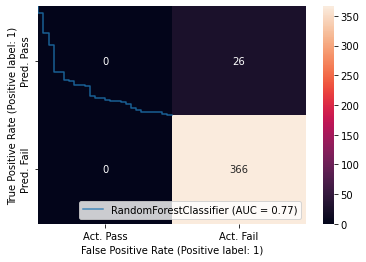

In [ ]:
rfc(X_train_knn,X_test_knn,4)

## Explored and Rejected : Mice

In [ ]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
imp = IterativeImputer(estimator=lr,missing_values=np.nan, max_iter=10, verbose=2, imputation_order='roman',random_state=0)
X_train_mice =imp.fit_transform(X_train_unique)

In [ ]:
X_test_MICE = X_test_unique.copy(deep=True)
X_test_MICE.iloc[:,:] = pd.DataFrame(imp.fit_transform(X_test_unique))
X_test_unique = X_test_MICE

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        26
           1       0.93      1.00      0.97       366

    accuracy                           0.93       392
   macro avg       0.47      0.50      0.48       392
weighted avg       0.87      0.93      0.90       392

Test Accuracy Score 0.9336734693877551


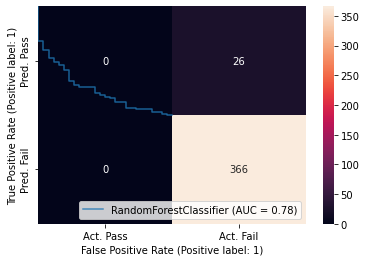

In [ ]:
rfc(X_train_mice,X_test_MICE,4)

In [ ]:
lr = LinearRegression()
imp = IterativeImputer(estimator=lr,missing_values=np.nan, max_iter=20, verbose=2, imputation_order='roman',random_state=0)
X_train_mice_20 =imp.fit_transform(X_train_unique)

In [ ]:
X_test_MICE_20 = X_test_unique.copy(deep=True)
X_test_MICE_20.iloc[:,:] = pd.DataFrame(imp.fit_transform(X_test_unique))
X_test_unique = X_test_MICE_20

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        26
           1       0.93      1.00      0.97       366

    accuracy                           0.93       392
   macro avg       0.47      0.50      0.48       392
weighted avg       0.87      0.93      0.90       392

Test Accuracy Score 0.9336734693877551


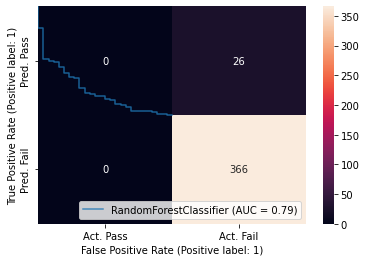

In [ ]:
rfc(X_train_mice_20,X_test_MICE_20,4)

# Feature Selection

## Boruta - 15 features

In [ ]:
#Boruta function

def BorutaFeatureSelection (X, y) :
    feature_names = np.array(X.columns)

    model = model = RandomForestClassifier(n_jobs=-1, class_weight='balanced_subsample', max_depth=5, random_state=100)
    model.fit(X, y)
    
    feature_selector = BorutaPy(model, n_estimators='auto', verbose=2, random_state=100, max_iter=100)

    feature_selector.fit(X.to_numpy(),y)

    feature_selector.support_

    feature_selector.ranking_

    feature_ranks = list(zip(feature_names, 
                             feature_selector.ranking_, 
                             feature_selector.support_))

    for feat in feature_ranks:
        print('Feature: {:<30} Rank: {},  Keep: {}'.format(feat[0], feat[1], feat[2]))
        
    final_features = list()
    indexes = np.where(feature_selector.ranking_ <= 1)
    for x in np.nditer(indexes):
        final_features.append(feature_names[x])
    print(final_features)
    
    return pd.DataFrame(X.filter(final_features)) , final_features

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from boruta import BorutaPy
X_train_boruta , final_features = BorutaFeatureSelection(X_train_knn,y_train.values.ravel())

In [ ]:
# From test set deleting columns that are removed in training set
X_test_boruta = X_test_knn[np.array(X_train_boruta.columns)]
X_test_boruta.shape

(392, 15)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        26
           1       0.93      1.00      0.97       366

    accuracy                           0.93       392
   macro avg       0.47      0.50      0.48       392
weighted avg       0.87      0.93      0.90       392

Test Accuracy Score 0.9336734693877551


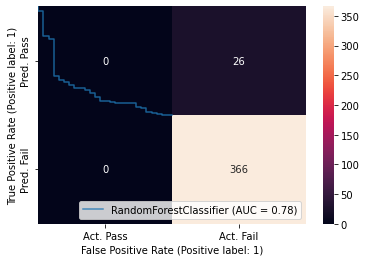

In [ ]:
rfc(X_train_boruta,X_test_boruta,6)

## Chi Square based on P values over less than 0.4 - 29 features

In [ ]:
from sklearn.feature_selection import SelectKBest, chi2
f_score = chi2(normalized_x_train,y_train)
p_values = pd.Series(f_score[1])
p_values.index = normalized_x_train.columns
p_values.sort_values(ascending=True,inplace=True)
significant = p_values[0:29]
new = list(significant.index)
X_train_chi = X_train_knn.loc[:, new]

In [ ]:
# From test set deleting columns that are removed in training set
X_test_chi = X_test_knn[np.array(X_train_chi.columns)]
X_test_chi.shape

(392, 29)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        26
           1       0.93      1.00      0.97       366

    accuracy                           0.93       392
   macro avg       0.47      0.50      0.48       392
weighted avg       0.87      0.93      0.90       392

Test Accuracy Score 0.9336734693877551


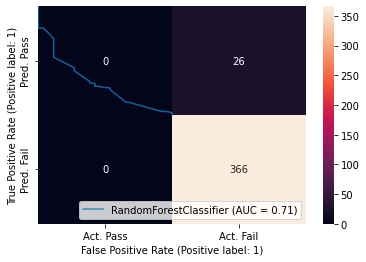

In [ ]:
rfc(X_train_chi,X_test_chi,7)

## Chi Square based on top values- 20 features

In [ ]:
from sklearn.feature_selection import SelectKBest, chi2
chi = SelectKBest(chi2, k=15).fit(normalized_x_train, y_train)
new_c = normalized_x_train.columns[chi.get_support()]
X_train_chi_k = X_train_knn.loc[:, new_c]

In [ ]:
# From test set deleting columns that are removed in training set
X_test_chi_k = X_test_knn[np.array(X_train_chi_k.columns)]
X_test_chi_k.shape

(392, 15)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        26
           1       0.93      1.00      0.97       366

    accuracy                           0.93       392
   macro avg       0.47      0.50      0.48       392
weighted avg       0.87      0.93      0.90       392

Test Accuracy Score 0.9336734693877551


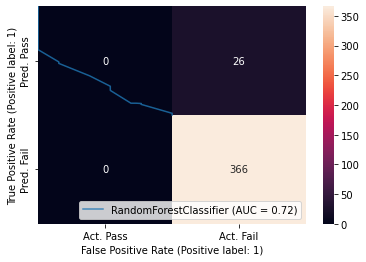

In [ ]:
rfc(X_train_chi_k,X_test_chi_k,7)

## Mutual Info gain - 15 features

In [ ]:
from sklearn.feature_selection import mutual_info_classif
mutual = mutual_info_classif(X_train_knn,y_train.values.ravel())
from sklearn.feature_selection import SelectKBest
top20 = SelectKBest(mutual_info_classif,k=15).fit(X_train_knn,y_train)
new_m = X_train_knn.columns[top20.get_support()]
X_train_m = X_train_knn.loc[:, new_m]

In [ ]:
# From test set deleting columns that are removed in training set
X_test_m = X_test_knn[np.array(X_train_m.columns)]
X_test_m.shape

(392, 15)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        26
           1       0.93      1.00      0.97       366

    accuracy                           0.93       392
   macro avg       0.47      0.50      0.48       392
weighted avg       0.87      0.93      0.90       392

Test Accuracy Score 0.9336734693877551


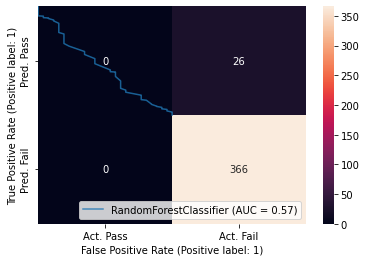

In [ ]:
rfc(X_train_m,X_test_m,6)

## Lasso - 31 features

In [ ]:
import numpy as np
import pandas as pd
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_selection import SelectFromModel
from sklearn import model_selection
import matplotlib.pyplot as plt
from sklearn.linear_model import RidgeCV, LassoCV
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.linear_model import Lasso, LogisticRegression

In [ ]:
## Selecting features using Lasso
sel_ = SelectFromModel(Lasso(alpha=0.2))
sel_.fit(X_train_knn, y_train)
sel_.get_support()
X_train_knn = pd.DataFrame(X_train_knn)

In [ ]:
#To See Selected set of features

selected_feat = X_train_knn.columns[(sel_.get_support())]
print('total features: {}'.format((X_train_knn.shape[1])))
print('selected features: {}'.format(len(selected_feat)))
print('features with coefficients shrank to zero: {}'.format(
np.sum(sel_.estimator_.coef_ == 0)))

total features: 442
selected features: 0
features with coefficients shrank to zero: 442


In [ ]:
#Make a list of with the selected features
removed_feats = X_train_knn.columns[(sel_.estimator_.coef_ == 0).ravel().tolist()]
removed_feats

X_train_lasso = sel_.transform(X_train_knn)
X_test_lasso = sel_.transform(X_test_knn)
X_train_lasso.shape, X_test_lasso.shape

((1175, 0), (392, 0))

In [540]:
rfc(X_train_lasso,X_test_lasso,6)

ValueError: ignored

In [542]:
pip install BorutaPy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement BorutaPy (from versions: none)
ERROR: No matching distribution found for BorutaPy
